In [3]:
import dpp_nets.my_torch as my_torch
import torch
import numpy as np
from dpp_nets.my_torch.controlvar import compute_alpha
import matplotlib.pyplot as plt
from dpp_nets.dpp.score_dpp import score_dpp
from dpp_nets.dpp.sample_dpp import sample_dpp
import dpp_nets.helper.plotting as plot
from dpp_nets.my_torch.baseline import RegressorBaseline

def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)

def overwrite_weights(from_model, to_model):
    from_dict = from_model.state_dict()
    to_dict = to_model.state_dict()
    
    for k in to_dict.keys():
        to_dict[k] = from_dict[k]
    
    to_model.load_state_dict(to_dict)
    return to_model

network_params = {'emb_in': 80, 'emb_h': 200, 'emb_out': 100,
                  'pred_in': 40, 'pred_h': 100, 'pred_out': 1,
                  'set_size': 40} 

dtype = torch.DoubleTensor

train_iter_base = 200
batch_size = 10
train_iter = batch_size * train_iter_base
sample_iter = 1
alpha_iter = 0
lr = 1e-5
weight_decay = 0
reg_exp = 1
reg_var = 0
rajeesh=True
el_mean=False
overwrite=0
alll=True

In [4]:
set_seed(33)
DPP = my_torch.DPPRegressor(network_params, dtype)
baseline = RegressorBaseline(network_params, dtype)
baseline = overwrite_weights(DPP, baseline)

Number of different clusters was:  12
Number of clusters predicted was:  -0.7731454863464942
Resultant loss was:  163.1532456153738
Retrieved subset was of size:  23
Number of clusters detected by DPP was:  12
Number of different clusters was:  14
Number of clusters predicted was:  28.29394288775461
Resultant loss was:  204.3168032783906


In [124]:
# try to train the DPP network

train_iter_base = 200
batch_size = 100
train_iter = batch_size * train_iter_base
sample_iter = 5
alpha_iter = 5
lr = 5e-4
weight_decay = 0
reg_exp = 0
reg_var = 0
rajeesh=False
el_mean=False
overwrite=0
alll=True

In [128]:
DPP.train_DPP_strong(train_iter, batch_size, sample_iter, alpha_iter, lr, weight_decay, reg_exp, reg_var, 
        rajeesh, el_mean, overwrite)

50 1.0
100 9.0
150 4.0
200 81.0
250 9.0
300 4.0
350 1.0
400 4.0
450 1.0
500 1.0
550 25.0
600 25.0
650 100.0
700 25.0
750 1.0
800 4.0
850 25.0
900 1.0
950 4.0
1000 81.0
1050 16.0
1100 25.0
1150 1.0
1200 100.0
1250 1.0
1300 16.0
1350 4.0
1400 16.0
1450 36.0
1500 4.0
1550 4.0
1600 25.0
1650 4.0
1700 81.0
1750 4.0
1800 100.0
1850 36.0
1900 9.0
1950 36.0
2000 25.0
2050 49.0
2100 49.0
2150 16.0
2200 9.0
2250 49.0
2300 25.0
2350 4.0
2400 36.0
2450 1.0
2500 1.0
2550 16.0
2600 1.0
2650 16.0
2700 36.0
2750 4.0
2800 9.0
2850 4.0
2900 16.0
2950 9.0
3000 16.0
3050 9.0
3100 9.0
3150 36.0
3200 4.0
3250 64.0
3300 9.0
3350 25.0
3400 25.0
3450 9.0
3500 16.0
3550 49.0
3600 4.0
3650 16.0
3700 25.0
3750 1.0
3800 9.0
3850 4.0
3900 16.0
3950 49.0
4000 81.0
4050 36.0
4100 4.0
4150 4.0
4200 4.0
4250 16.0
4300 1.0
4350 4.0
4400 1.0
4450 1.0
4500 4.0
4550 4.0
4600 1.0
4650 16.0
4700 4.0
4750 9.0
4800 1.0
4850 64.0
4900 4.0
4950 9.0
5000 36.0
5050 49.0
5100 25.0
5150 36.0
5200 81.0
5250 49.0
5300 1.0
5350 16.0
54

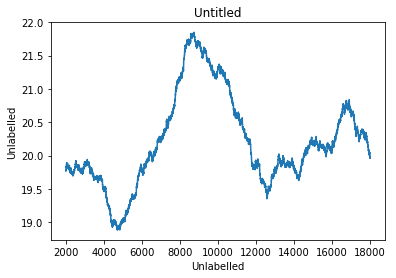

In [129]:
# Plot a loss function
plot.plot_defaultdict(DPP.loss_dict,4000)

In [ ]:
set_seed(12)
DPP.evaluate(2000)
set_seed(12)
untrained.evaluate(2000)

In [135]:
set_seed(33)
untrained = my_torch.DPPRegressor(network_params, dtype)
untrained.ortho = False

Number of different clusters was:  12
Number of clusters predicted was:  -0.7731454863464942
Resultant loss was:  163.1532456153738
Retrieved subset was of size:  23
Number of clusters detected by DPP was:  12


Number of different clusters was:  12
Number of clusters predicted was:  3.6575110885048074
Resultant loss was:  69.59712123842023
Retrieved subset was of size:  12
Number of clusters detected by DPP was:  11


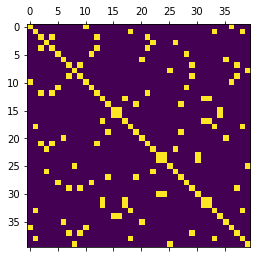

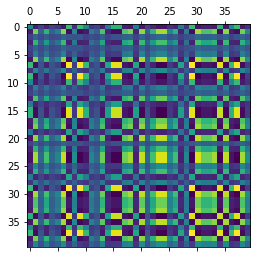

Number of different clusters was:  12
Number of clusters predicted was:  27.89935437365127
Resultant loss was:  252.7894694989438
Retrieved subset was of size:  22
Number of clusters detected by DPP was:  12


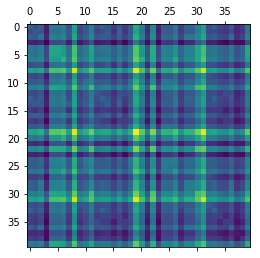

In [143]:
# Doing the plotting

seed = 5l
set_seed(seed)
(pred, target), (words, context), clusters = DPP.sample()
plot.plot_matrix(plot.gen_matrix_from_cluster_ix(clusters))
plot.plot_embd(DPP.embedding.data)

set_seed(seed)
(pred, target), (words, context), clusters = untrained.sample()
plot.plot_embd(untrained.embedding.data)

In [ ]:
words1

In [ ]:
words.data[1]

In [123]:
# Save a state-dict
torch.save(DPP.state_dict(), "dpp_nets/models/loss_baseline_long.p")

In [ ]:
print("done")

In [5]:
# Load pre-trained predcitor
import copy

trained_pred = torch.load("dpp_nets/models/loss_baseline_long.p")
state_clone = copy.deepcopy(trained_pred)
model = my_torch.DPPRegressor(network_params, dtype)
model.load_state_dict(trained_pred)

DPP.load_state_dict(state_clone)
set_seed(10)
DPP.evaluate(1000)

Number of different clusters was:  16
Number of clusters predicted was:  5.034453827364458
Resultant loss was:  120.24320286420196
Retrieved subset was of size:  25
Number of clusters detected by DPP was:  14
Average Loss is:  134.44070574472107
Average Subset Size:  10.205999999999994
Subset Variance:  0.15747869396201772
Proportion of true clusters retrieved: 0.7824907999225257


In [ ]:
from torch.autograd import Variable
A = Variable(torch.randn(5,10))

In [ ]:
mask = Variable(to)

In [ ]:
torch.ByteTensor([1,0,1,0,1]).unsqueeze(1).expand([5,10])

In [ ]:
A = Variable(torch.randn(3,5,2))
print(A)
mask = Variable(torch.ByteTensor([[1,1,1,1,0],[1,1,0,0,0],[1,1,1,1,1]]).unsqueeze(2).expand(3,5,2))
A.masked_select(mask).view(-1,2)

In [ ]:
mask = torch.ByteTensor([[1,1,1,1,0],[1,1,0,0,0],[1,1,1,1,1]]).unsqueeze(2).expand(3,5,2)

In [ ]:
import numpy as np

In [ ]:
np.random.normal(5*np.arange(9,dtype=float), scale=0.5)

In [ ]:
np.arange(9)

In [ ]:
set_size = 40
pred_in = 50

SCALE = 5
OFFSET = 20
STD = 0.5
GLUE = 5

words = np.random.randn(set_size, pred_in)
n_clusters = 1 + np.random.choice(20,1) 
rep = (set_size // n_clusters) + 1 
clusters = np.random.choice(pred_in, n_clusters, replace=False) # there are pred_in different clusters altogether
clusters = np.tile(clusters, rep)[:(set_size)]
cluster_means = SCALE * (clusters - OFFSET)
cluster_means = np.tile(cluster_means,[GLUE, 1]).T
words[:,:GLUE] = np.random.normal(cluster_means, STD)

In [ ]:
words = torch.randn(40,40)
context = words.sum(dim=0).expand_as(words)
x = Variable(torch.cat([words, context], dim = 1))

In [25]:
DPP.ortho

True

In [ ]:
words = torch.randn(40,40)
context = words.sum(dim=0).expand_as(words)
x = Variable(torch.cat([words, context], dim = 1))
model = nn.Sequential(nn.Linear(80,200), nn.ELU(), nn.Linear(200,100))
model(x).data
plot.plot_embd(model(x).data)

In [ ]:
def compute_miss(clusters, subset):
    # How many different clusters were detected?
    true_ix = clusters.numpy()
    retr_ix = torch.diag(subset.data).numpy()
    detected = true_ix[retr_ix.astype(bool)]
    n_detected = np.unique(detected).size
    target = np.unique(true_ix).size
    missed = float((target - n_detected))
    too_many = np.sum(retr_ix) - target
    maxi = max(missed, too_many)
    loss = Variable(self.dtype([maxi**2]))
    return loss